### Initial Imports

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [6]:
df = pd.read_csv('adult(cleaned).csv')

### Splitting Features and Target

In [7]:
x = df.drop('income', axis = 1)
y = df[['income']]

### Checking y value split

In [8]:
y.value_counts()

income
0         34569
1         11416
Name: count, dtype: int64

### Splitting Train Test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y.values.ravel(), random_state=42, stratify=y)

### Function to display metrics of Model

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

def metrics(y_true, y_pred):
    print(f"accuracy : {accuracy_score(y_true, y_pred)}" )
    print(f"recall : {recall_score(y_true, y_pred)}" )
    print(f"precision : {precision_score(y_true, y_pred)}" )
    print(f"f1 : {f1_score(y_true, y_pred)}" )
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### KNN Champion Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier

accuracy : 0.83813168652692
recall : 0.6142256482130344
precision : 0.6975726223637088
f1 : 0.6532513508477734


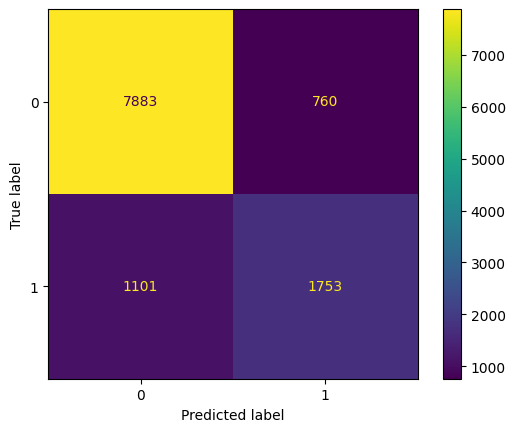

In [15]:
KNN = KNeighborsClassifier(n_neighbors=29, metric="manhattan", weights="distance")
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
metrics(y_test, y_pred)